# (**120 years of olympic history athletes and results** Exploration )
## by (Hussien Mostafa Said Elkholy)

## Preliminary Wrangling

 I used data sets of **"120-years-of-olympic-history-athletes-and-results"** in [Kaggele](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) which has information about players , their teams , medals and gende

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
color_base=sb.color_palette()[0]
%matplotlib inline




In [2]:
import warnings
warnings.filterwarnings('ignore')

df =pd.read_csv('athlete_events.csv')
df_noc=pd.read_csv('noc_regions.csv')
df.head()
  

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
df_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
"""making sure that all Games column data is in Year, Season columns"""
wrong_rows=df.shape[0]-(df.Games==df.Year.astype('str')+" "+df.Season).sum()
print(wrong_rows)

0


no need for Games column  

In [7]:
df.drop(['Games','ID','Event'],axis=1,inplace=True)

In [8]:
df=pd.merge(df_noc,df,on='NOC',how='inner')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   NOC     270767 non-null  object 
 1   region  270746 non-null  object 
 2   notes   5039 non-null    object 
 3   Name    270767 non-null  object 
 4   Sex     270767 non-null  object 
 5   Age     261305 non-null  float64
 6   Height  210684 non-null  float64
 7   Weight  207982 non-null  float64
 8   Team    270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Medal   39774 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [10]:
df[df.region.isna()].Team.unique()


array(['Refugee Olympic Athletes', 'Tuvalu', 'Unknown'], dtype=object)

In [11]:
df[df.Team=='Tuvalu']


,NOC,region,notes,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Medal
237700,TUV,NaN,Tuvalu,Logona Esau,M,21.0,163.0,69.0,Tuvalu,2008,Summer,Beijing,Weightlifting,NaN
237701,TUV,NaN,Tuvalu,Tuau Lapua Lapua,M,21.0,140.0,62.0,Tuvalu,2012,Summer,London,Weightlifting,NaN
237702,TUV,NaN,Tuvalu,Asenate Manoa,F,16.0,NaN,46.0,Tuvalu,2008,Summer,Beijing,Athletics,NaN
237703,TUV,NaN,Tuvalu,Asenate Manoa,F,20.0,NaN,46.0,Tuvalu,2012,Summer,London,Athletics,NaN
237704,TUV,NaN,Tuvalu,Tavevele Noa,M,20.0,176.0,74.0,Tuvalu,2012,Summer,London,Athletics,NaN
237705,TUV,NaN,Tuvalu,Etimoni Timuani,M,24.0,184.0,72.0,Tuvalu,2016,Summer,Rio de Janeiro,Athletics,NaN
237706,TUV,NaN,Tuvalu,Okilani Tinilau,M,19.0,NaN,NaN,Tuvalu,2008,Summer,Beijing,Athletics,NaN


In [12]:
df[df.Team=='Refugee Olympic Athletes']


,NOC,region,notes,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Medal
198447,ROT,NaN,Refugee Olympic Team,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198448,ROT,NaN,Refugee Olympic Team,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Swimming,NaN
198449,ROT,NaN,Refugee Olympic Team,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Swimming,NaN
198450,ROT,NaN,Refugee Olympic Team,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198451,ROT,NaN,Refugee Olympic Team,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Judo,NaN
198452,ROT,NaN,Refugee Olympic Team,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198453,ROT,NaN,Refugee Olympic Team,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198454,ROT,NaN,Refugee Olympic Team,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198455,ROT,NaN,Refugee Olympic Team,Rose Nathike Lokonyen,F,21.0,157.0,50.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Athletics,NaN
198456,ROT,NaN,Refugee Olympic Team,Yusra Mardini,F,18.0,157.0,53.0,Refugee Olympic Athletes,2016,Summer,Rio de Janeiro,Swimming,NaN


### What is the structure of your dataset?


- Data in <b>athlete_events.csv</b>

<table style="width:50%">
  <tr>
    <th>variable</th>
    <th>explanation</th> 
  </tr>
  <tr>
    <td>ID</td>
    <td>Unique number for each athlete</td>
  </tr>
  <tr>
    <td>Height</td>
    <td>In centimeters</td>
  </tr>
<tr>
    <td>Sex</td>
    <td>F or M</td>
  </tr>
<tr>
    <td>Name</td>
    <td>Athlete's name</td>
  </tr>
<tr>
    <td>Age</td>
    <td>Integer</td>
  </tr>
<tr>
    <td>Weight</td>
    <td>In kilograms</td>
  </tr>
<tr>
    <td>Team</td>
    <td>Team name</td>
  </tr>
<tr>
    <td>NOC</td>
    <td>National Olympic Committee 3-letter code</td>
  </tr>
<tr>
    <td>Games</td>
    <td>Year and season</td>
  </tr>
<tr>
    <td>Year</td>
    <td>Integer</td>
  </tr>
<tr>
    <td>Season</td>
    <td>Summer or Winter</td>
  </tr>
<tr>
    <td>City</td>
    <td>Host city</td>
  </tr>

<tr>
    <td>City</td>
    <td>Host city</td>
  </tr>

<tr>
    <td>Sport</td>
    <td>Sport</td>
  </tr>


<tr>
    <td>Event</td>
    <td>Event</td>
  </tr>

<tr>
    <td>Medal</td>
    <td>Gold, Silver, Bronze, or NA</td>
  </tr>
</table>
 



- Data in <b>noc_regions.csv</b>
<table style="width:25%">
<tr>
    <td>region</td>
    <td>matches with regions in map_data("world"))</td>
  </tr>
<tr>
    <td>Notes</td>
    <td>more data about team</td>
  </tr> 
</table>
    


 
 
### What is/are the main feature(s) of interest in your dataset?

- Event related : 
    - City
    - Year
- Athlete related:
    - Sport
    - Age
    - Weight
    - Height
    - Medal
    - Name
    - Team
    - region
    - notes



## Univariate Exploration



## Does younger players participate more ?

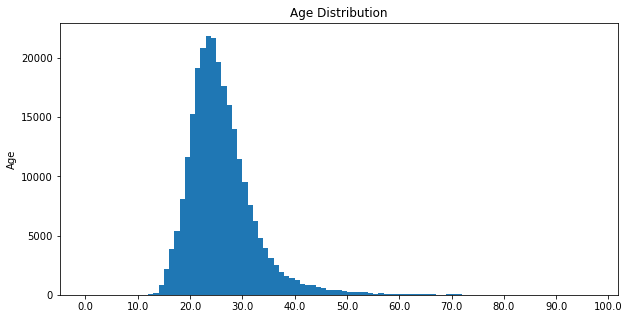

In [13]:
plt.figure(figsize=(10,5))
b=np.arange(0,df.Age.max()+1,1)
plt.hist(data=df,x='Age',color=color_base,bins=b);
t=np.arange(0,df['Age'].max()+10,10);
plt.xticks(t,t);
plt.title('Age Distribution');
plt.ylabel('Frequency');
plt.ylabel('Age');


- distribution is right skewed which is normal to expected to sports related event as most players should be younger 
- there is some players at ages  more than 50 
- further anlaysis is done in next cells

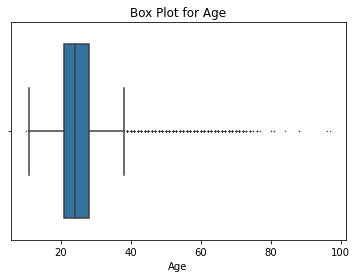

In [14]:
sb.boxplot(data=df,x='Age',fliersize=1/2)
plt.title('Box Plot for Age');
plt.xlabel('Age');


- there are many outliers on the right part of graph , maybe the reason for those are the kind of sport :**('Art Competitions' 'Equestrianism' 'Sailing' 'Shooting' 'Archery')**
- we just get the name of these sports to **analyse it in Bivariate Exploration** 

In [15]:
'''Sports for old players'''
s=df[df.Age>65].Sport.unique()
print(s)


['Art Competitions' 'Equestrianism' 'Sailing' 'Shooting' 'Archery']


## What is common weight ?

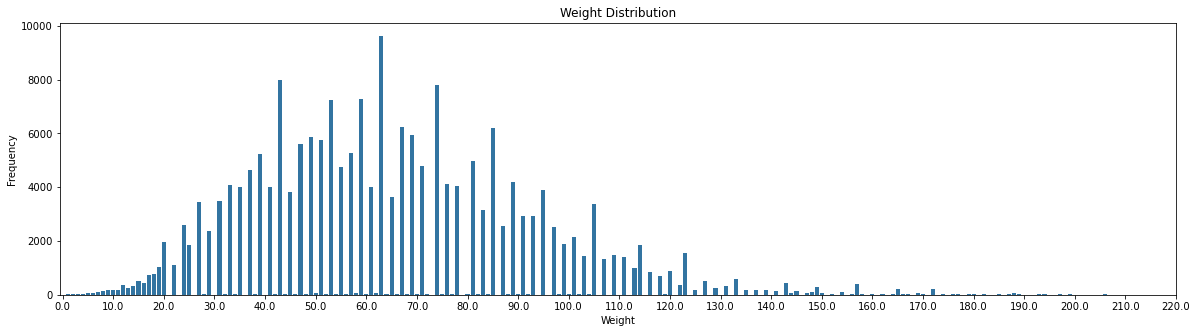

In [16]:
plt.figure(figsize=(20,5))
b=np.arange(0,df.Age.max()+5,5)
sb.countplot(data=df,x='Weight',color=color_base, );
t=np.arange(0,df['Weight'].max()+10,10);
plt.xticks(t,t);
plt.title('Weight Distribution');
plt.ylabel('Frequency');
plt.xlabel('Weight');


- distribution is right skewed and most common Weight is about 60
- further anlaysis is done in next cells

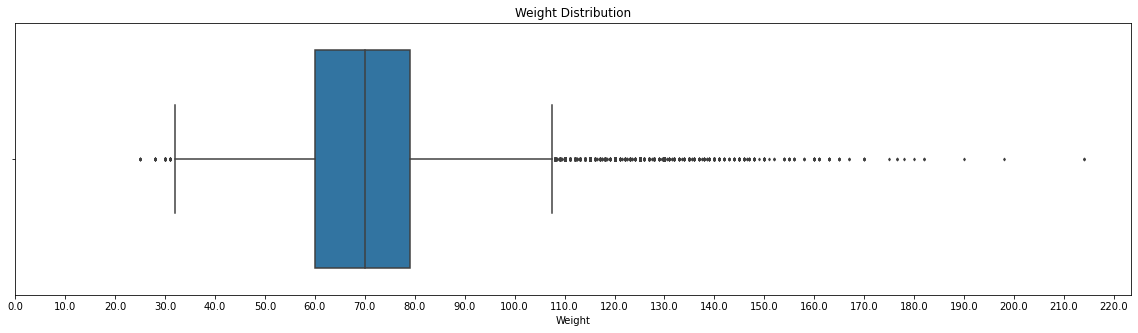

In [17]:
"""
Weight Distribution with box plot
"""
plt.figure(figsize=(20,5))

sb.boxplot(data=df,x='Weight',fliersize=2)
t=np.arange(0,df['Weight'].max()+10,10);
plt.xticks(t,t);
plt.title('Weight Distribution');


- there are many outliers on the right part of graph , maybe the reason for those are the kind of sport **('Weightlifting' 'Athletics' 'Judo' 'Basketball' 'Wrestling' 'Bobsleigh')**


- we just get the name of these sports to **analyse it in Bivariate Exploration** 

In [18]:
'''Sports for Fat players'''

s_w=df[df.Weight>140].Sport.unique()
print(s_w)


['Weightlifting' 'Athletics' 'Judo' 'Basketball' 'Wrestling' 'Bobsleigh']


 ## What is most common height ?

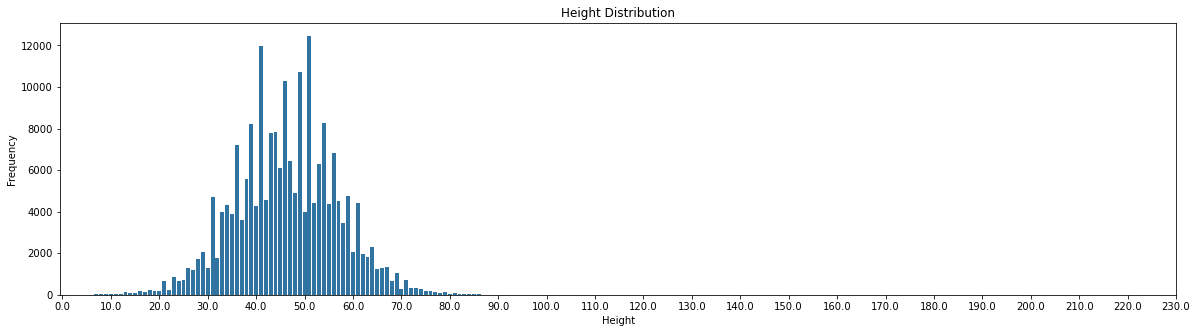

In [19]:
'Height Distribution with count plot'
plt.figure(figsize=(20,5))
b=np.arange(0,df.Age.max()+5,5)
sb.countplot(data=df,x='Height',color=color_base, );
t=np.arange(0,df['Height'].max()+10,10);
plt.xticks(t,t);
plt.title('Height Distribution');
plt.ylabel('Frequency');
plt.xlabel('Height');


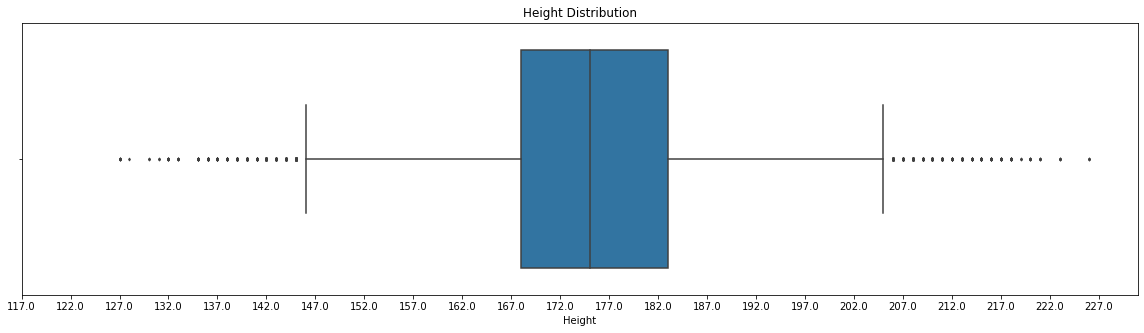

In [20]:
plt.figure(figsize=(20,5))
sb.boxplot(data=df,x='Height',fliersize=2)
t=np.arange(df['Height'].min()-10,df['Height'].max()+5,5);
plt.xticks(t,t);
plt.title('Height Distribution');


- there are many outliers on the right and left part of graph , maybe the reason for those are the kind of sport 
    
    -right:**('Basketball' 'Volleyball' 'Handball' 'Shooting' 'Sailing' 'Judo' 'Beach Volleyball' 'Wrestling' 'Bobsleigh')**
    
    -left:**('Gymnastics' 'Rowing' 'Swimming' 'Boxing' 'Shooting')**
    
- we just get the name of these sports to **analyse it in Bivariate Exploration** 

In [21]:
s_h_r=df[df.Height>210].Sport.unique()
print(s_h_r)


['Basketball' 'Volleyball' 'Handball' 'Shooting' 'Sailing' 'Judo'
 'Beach Volleyball' 'Wrestling' 'Bobsleigh']


In [22]:
s_h_l=df[df.Height<136].Sport.unique()
print(s_h_l)


['Gymnastics' 'Rowing' 'Swimming' 'Boxing' 'Shooting']


## What are most hosting cities ?

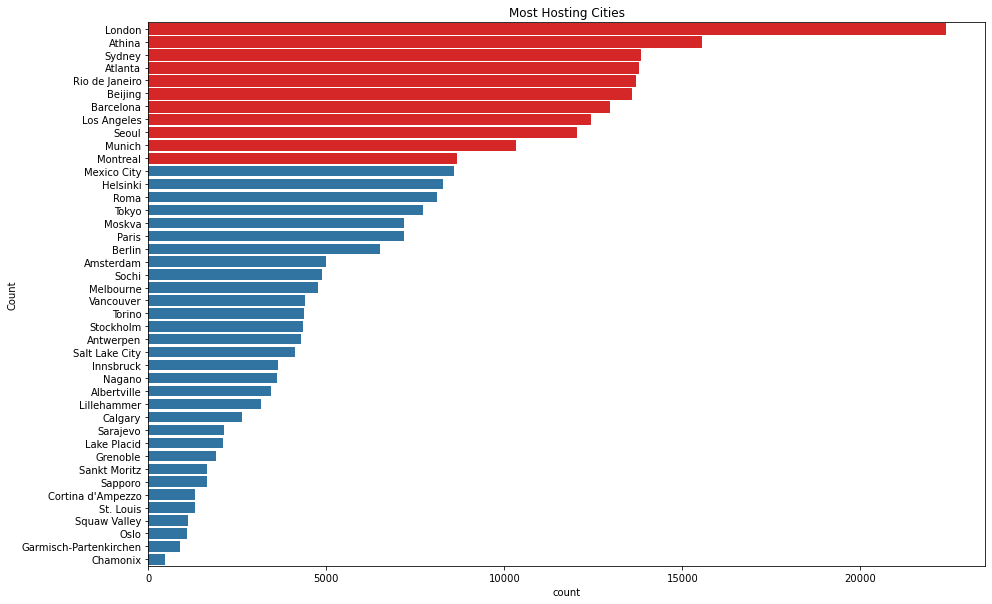

In [23]:
'''plot most hosting cities'''
plt.figure(figsize=(15,10))
order=df.groupby('City').size().sort_values(ascending=False).index
ax=sb.countplot(data=df,y="City",order=order,color=(color_base))
l = ax.get_children()[0:11]
for m in l :
    m.set_color(sb.color_palette()[3])

plt.title('Most Hosting Cities');
plt.ylabel('City');
plt.ylabel('Count');


**the top 10 Cities are higlited in red**

## Did olympics became more popular over year ?

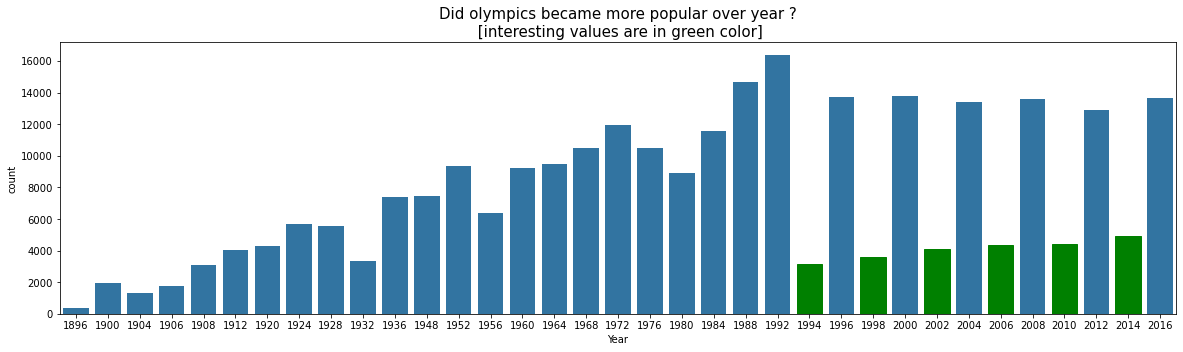

In [24]:
'''Did olympics became more popular over year ?
we just plot frquency over years'''
plt.figure(figsize=(20,5))
ax=sb.countplot(data=df,x="Year",color=color_base)
'''Higlight Strange Values'''

l = ax.get_children()[0:-10]
l=l[-12:-1:2]
for m in l :
    m.set_color('green');
plt.title('Did olympics became more popular over year ?\n [interesting values are in green color]',fontdict={'fontsize':15});


- more players join the olympics every year 
- we find from year 1994 there is some jitters "in green color"
- **Strange Values are Higlighted in green will be analysed in bivariate exploration**

## Are mens are more than women ?

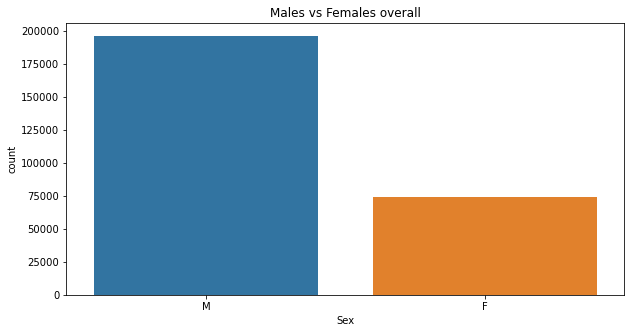

In [25]:
'''Males Vs Females '''
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='Sex',)
plt.title('Males vs Females overall');


Mens appeared more likely to go to olympics.

## top 10 players  going to olympics 

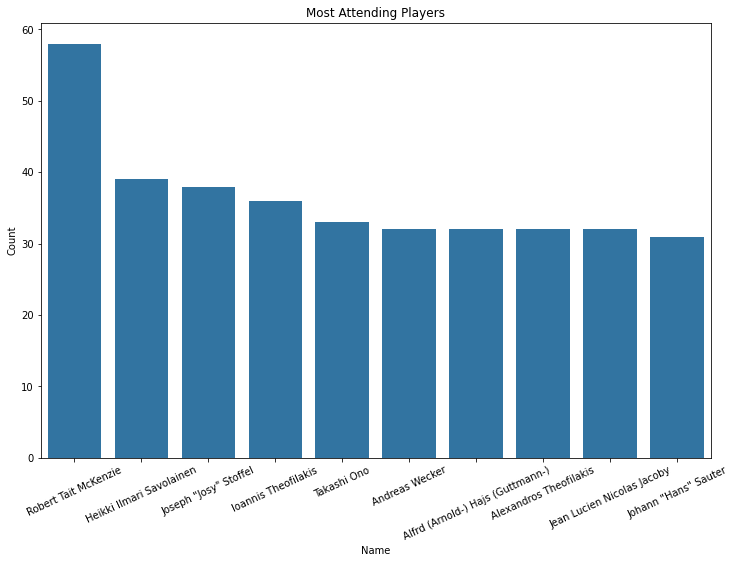

In [26]:
plt.figure(figsize=(12,8))
data=df.groupby('Name').size().sort_values(ascending=False).reset_index().head(10)
order=data.index
sb.barplot(data=data,y=0,x="Name",color=color_base)
plt.xticks(rotation=25);
plt.title('Most Attending Players');
plt.ylabel('Count');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

  - the olympics tend to be more popular over year but there are jitters from year 1994 to 2016
  - Men tend to like olympics than women 
  - There are independent teams like :
    - 'Refugee Olympic Athletes'
    - 'Tuvalu'


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

  there are many outliers in vriables (Age,Weight,Height) on the right part and I think the reson relates to certain sport type that will be explored in **bivariate exploration**

## Bivariate Exploration

 

## - does winter season has fewer players?
## - what is the reason for strange green jitters ?

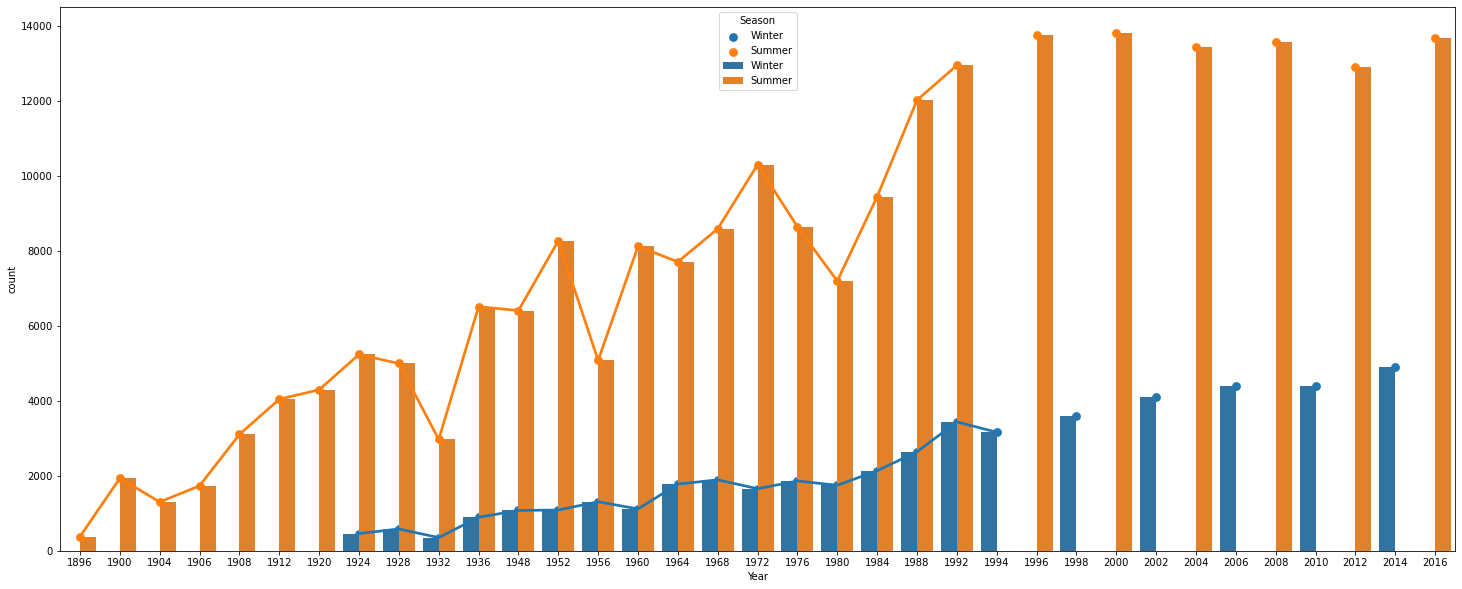

In [27]:
'''
using dx to store frequency of players over years and season to use it in point plot to show trend line
'''
plt.figure(figsize=(25,10))
dx=df.groupby(['Season','Year']).size().reset_index()
dx['count']=dx[0]
dx.drop(0,axis=1,inplace=True)
dx.shape
'''
 show frequency of players over years and season
'''
sb.countplot(data=df,x="Year",hue='Season',hue_order=['Winter','Summer'] )
'''
show trend line
'''

sb.pointplot(data=dx,x="Year",y='count',hue='Season',hue_order=['Winter','Summer'] );


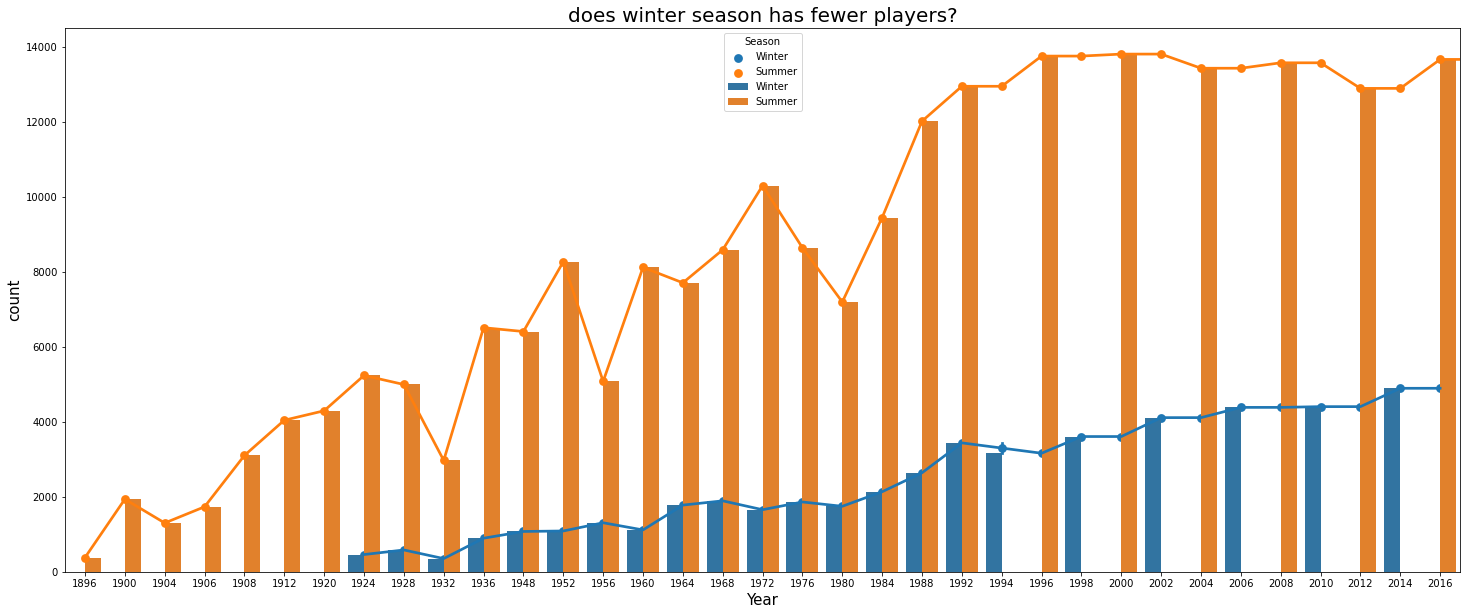

In [28]:

plt.figure(figsize=(25,10))
'''
trying to fill discontinuities in trend line 
'''
last=dx[dx.Year>=1992]
last_summer=last[last.Season=='Summer']
last_summer_copy=last_summer.copy()
last_summer_copy.Year=last_summer_copy.Year+2
dx=dx.append(last_summer_copy)
last_winter=last[last.Season=='Winter']
last_winter_copy=last_winter.copy()
last_winter_copy.Year=last_winter_copy.Year+2
dx=dx.append(last_winter_copy)
sb.pointplot(data=dx,x="Year",y='count',hue='Season',hue_order=['Winter','Summer'] )
ax=sb.countplot(data=df,x="Year",hue='Season',hue_order=['Winter','Summer'] )

plt.title('does winter season has fewer players?',fontdict={'fontsize':20,});
plt.ylabel('count',fontdict={'fontsize':15,});
plt.xlabel('Year',fontdict={'fontsize':15,});

- the reasons for jitters are :
    - that winter season has lower players 
    - from 1994 even years have olympics in winter and odd years have it in summer



## when independent teams started joining?

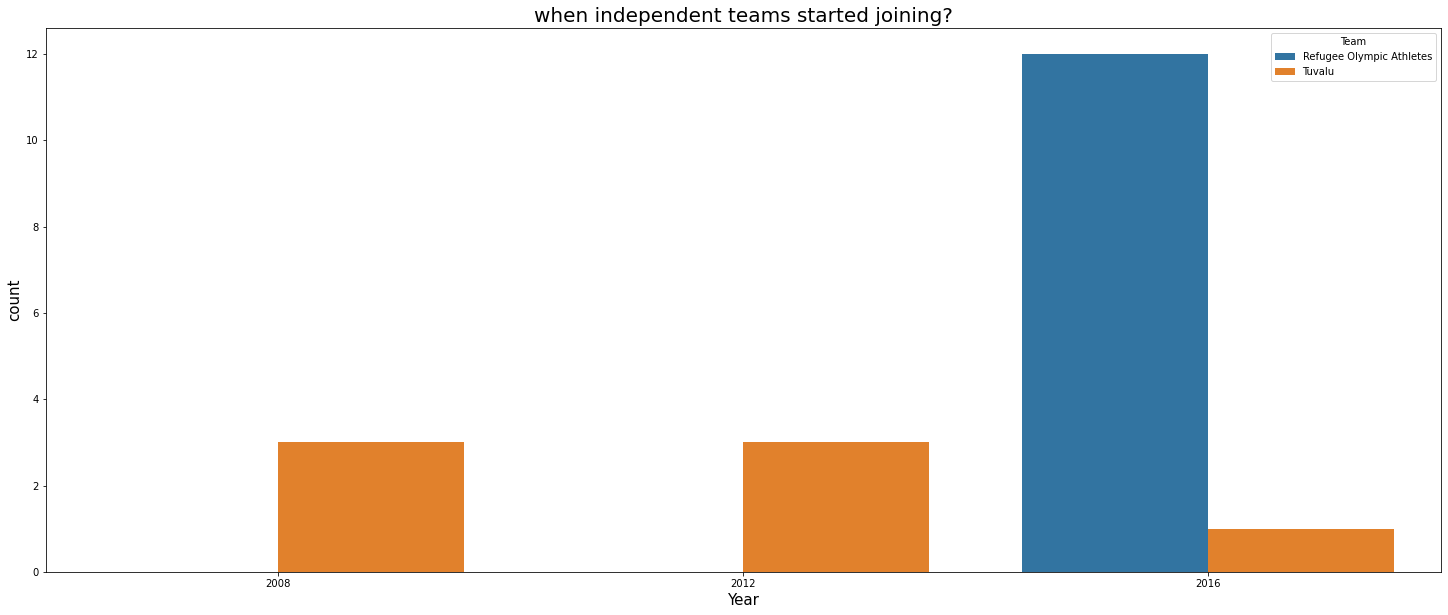

In [29]:
plt.figure(figsize=(25,10))
sb.countplot(data=df[df.Team.isin(['Refugee Olympic Athletes', 'Tuvalu'])],x='Year',hue='Team')
plt.title('when independent teams started joining?',fontdict={'fontsize':20,});
plt.ylabel('count',fontdict={'fontsize':15,});
plt.xlabel('Year',fontdict={'fontsize':15,});

## are there Sports that have older players as usual ?

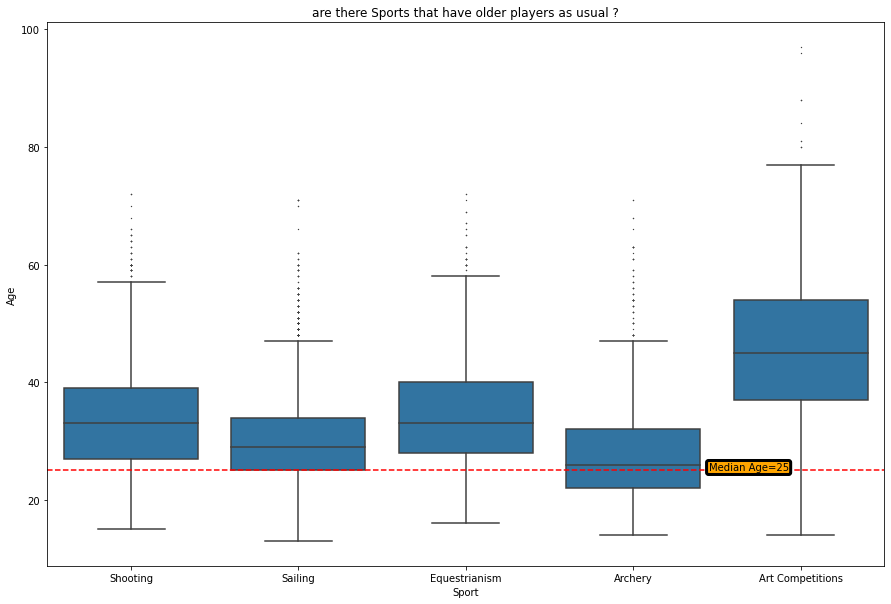

In [30]:
'''using data from univariate exploration '''
plt.figure(figsize=(15,10))
sb.boxplot(data=df[df.Sport.isin(s)],x='Sport',y='Age',fliersize=1/2,color=color_base)
plt.axhline(25,color='red',linestyle='--')
bbox_props = dict(boxstyle="Round,pad=0.2", fc="orange", ec="black", lw=3)
plt.annotate('Median Age=25',(3.45,25) , bbox=bbox_props)
plt.title('are there Sports that have older players as usual ?');

We can see that Arts doesn't require younger players as they are don't need large physical abilties.

## are there Sports that have players with more height than usual ?

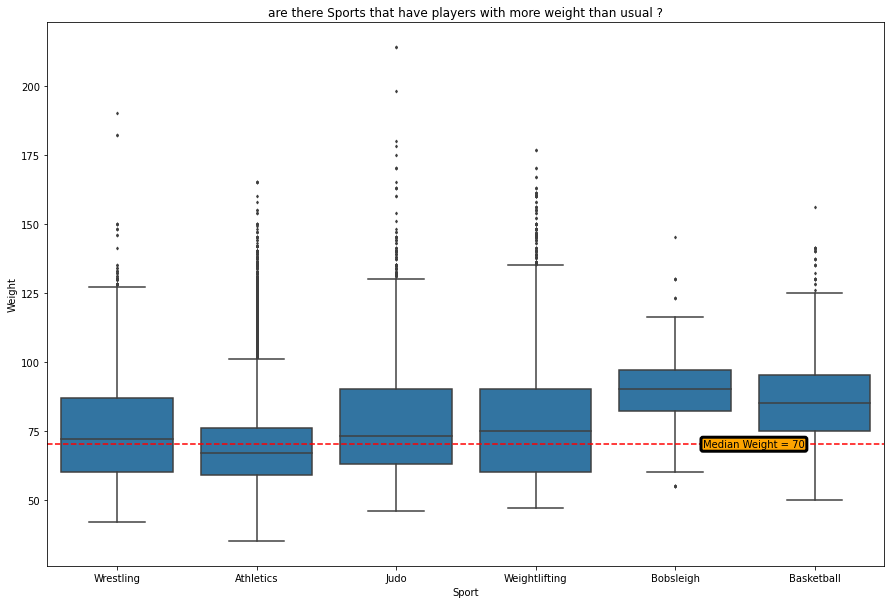

In [31]:
plt.figure(figsize=(15,10))

sb.boxplot(data=df[df.Sport.isin(s_w)],x='Sport',y='Weight',fliersize=2,color=color_base)
plt.axhline(70,color='red',linestyle='--')
bbox_props = dict(boxstyle="Round,pad=0.2", fc="orange", ec="black", lw=3)

plt.annotate('Median Weight = 70',(4.2,69),  bbox=bbox_props)
plt.title('are there Sports that have players with more weight than usual ?');

We can see that Basketball require higher players.

## are there Sports that have players with less Height than usual ?

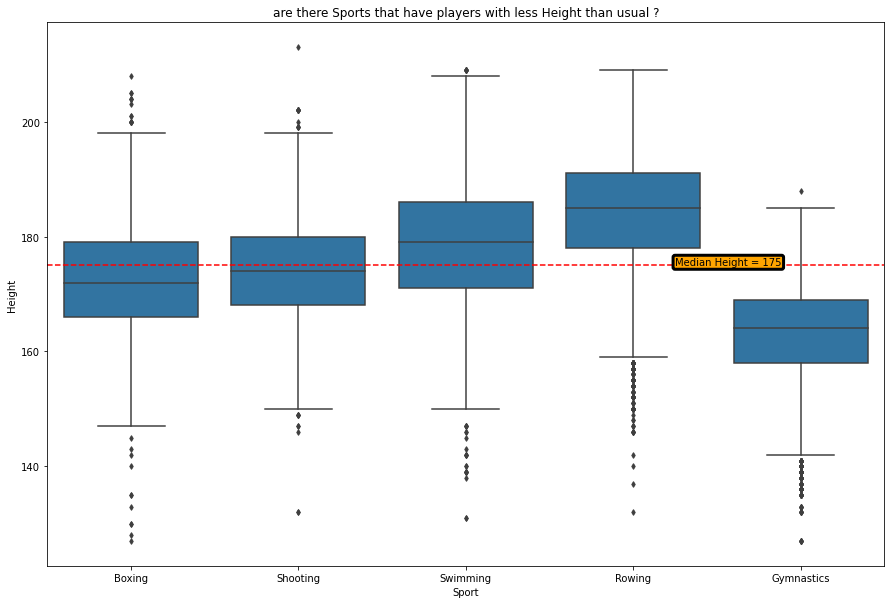

In [32]:
plt.figure(figsize=(15,10))
sb.boxplot(data=df[df.Sport.isin(s_h_l)],x='Sport',y='Height',fliersize=4,color=color_base)
plt.axhline(175,color='red',linestyle='--')
bbox_props = dict(boxstyle="Round,pad=0.2", fc="orange", ec="black", lw=3)
plt.annotate('Median Height = 175',(3.25,175), bbox=bbox_props);
plt.title('are there Sports that have players with less Height than usual ?');

We can see that gymnastics require players with less height.

## Is there is different distrubtion for strange sports aquired from previous sections  ?

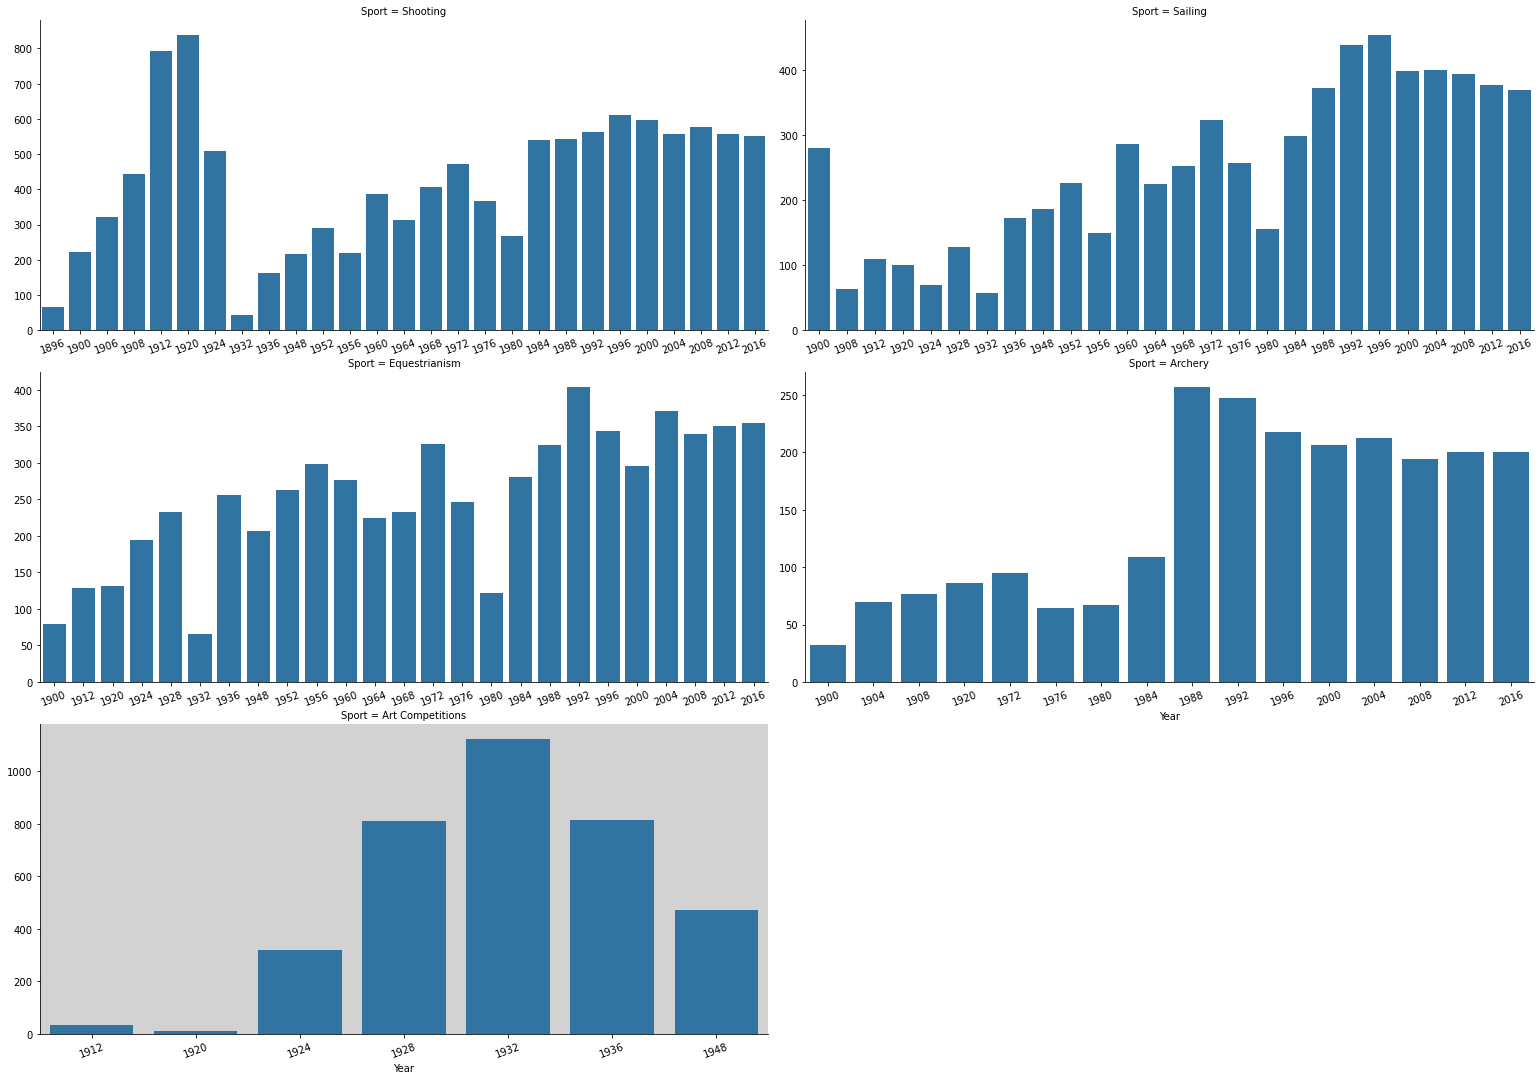

In [44]:

g=sb.FacetGrid(data=df[df.Sport.isin(s)],col='Sport',col_wrap=2,height=5,aspect=2.15,sharey=False,sharex=False)
g.map(sb.countplot,'Year')
g.set_xticklabels(rotation=20)
# customize first subplot
ax = g.axes[4]  
l = ax.get_children()
l[-1].set_color((0.65,0.65,0.65,.5))


- we find that no players intersted in Arts after 1948 but other sports are the same 

## is olympics more popular for men over years ?

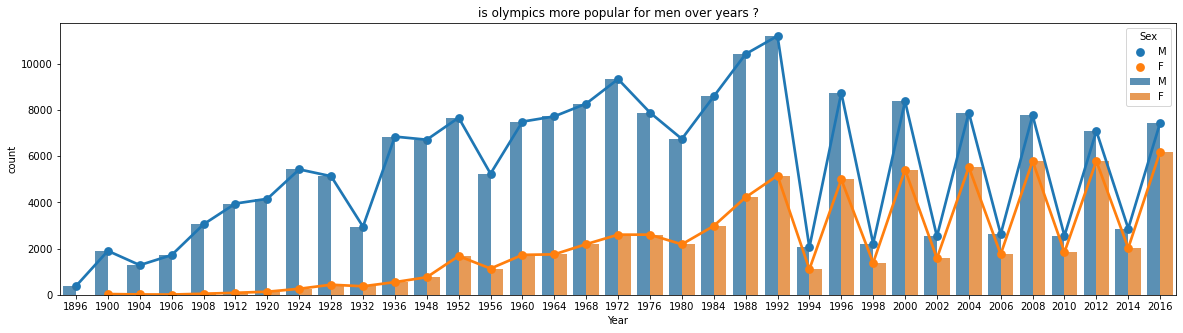

In [34]:
plt.figure(figsize=(20,5))
dx=df.groupby(['Sex','Year']).size().reset_index()
dx['count']=dx[0]
dx.drop(0,axis=1,inplace=True)
sb.pointplot(data=dx,x= 'Year',y='count',alpha=0.8,hue='Sex',hue_order=['M','F'] )

sb.countplot(data=df,x="Year",hue='Sex',hue_order=['M','F'] ,alpha=0.8)
plt.title('is olympics more popular for men over years ?');


we find over years mens and women have similar frequency 

## is Age realted to weight or height for winners?

In [35]:
df2=df.drop(df[df.Medal.isna()].index)
 

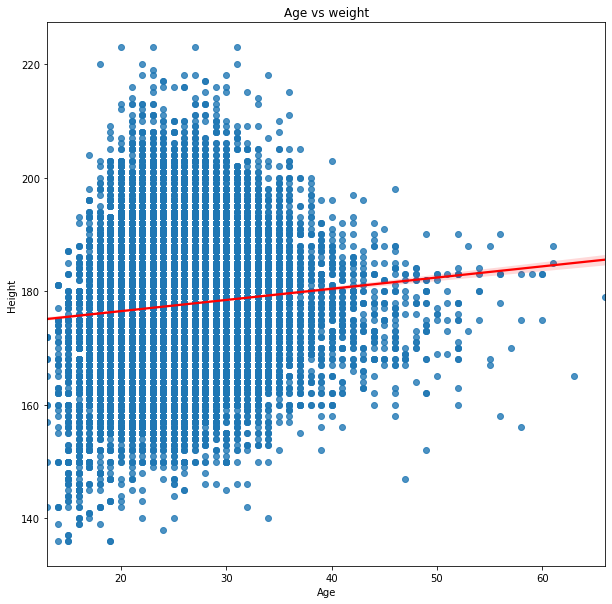

In [36]:
plt.figure(figsize=(10,10))
sb.regplot(data=df2,x='Age',y='Height',line_kws={'color':'red'},)
plt.title('Age vs weight');

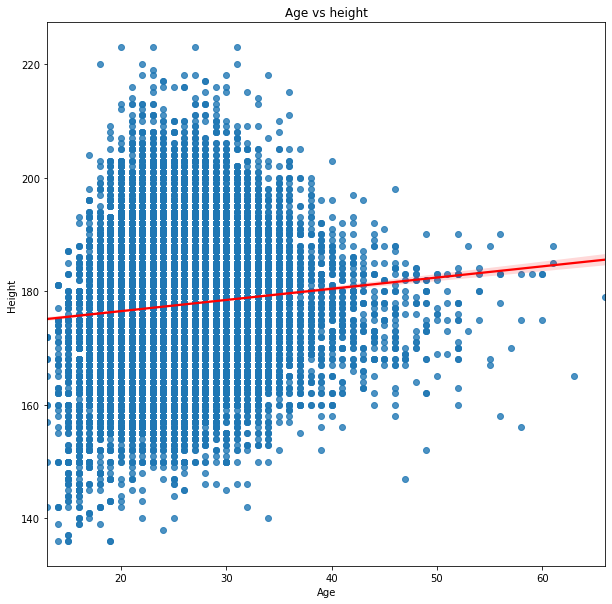

In [37]:

plt.figure(figsize=(10,10))
sb.regplot(data=df2,x='Age',y='Height',line_kws={'color':'red'})
plt.title('Age vs height');

## top 10 players in each medal ?

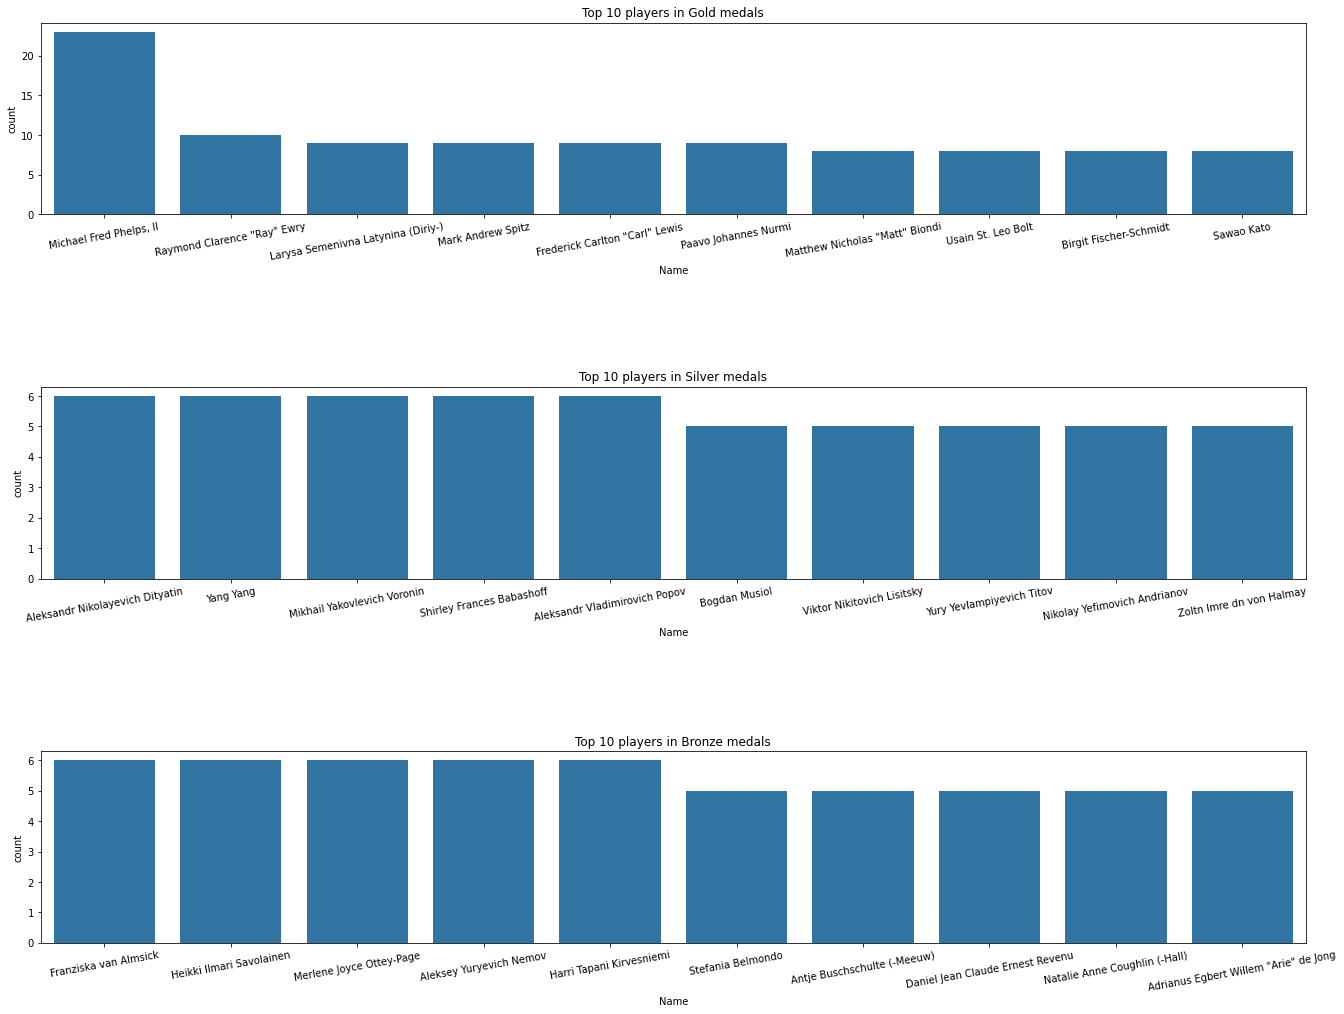

In [38]:
data=df.groupby(['Name','Medal']).size().sort_values(ascending=False).reset_index() 
order=data.index
data.columns=['Name', 'Medal', 'count']
vals=['Gold','Silver','Bronze']
f,ax=plt.subplots(3,1)
i=0
f.tight_layout()

for val in vals:
    sb.barplot(data=data.query('Medal==@val').head(10),y='count',x="Name",ax=ax[i],color=color_base)
    ax[i].figure.set_size_inches(20, 15)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=10)
    ax[i].set_title('Top 10 players in ' +val+ ' medals')
    i=i+1
plt.subplots_adjust( hspace=0.9)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


- no relation between age and weight or height for winners
- Basketball need higher players
- Arts has no players in modern history
- from 1994 only one season is held in every year




## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## women and men interest over year and season

<Figure size 1440x360 with 0 Axes>

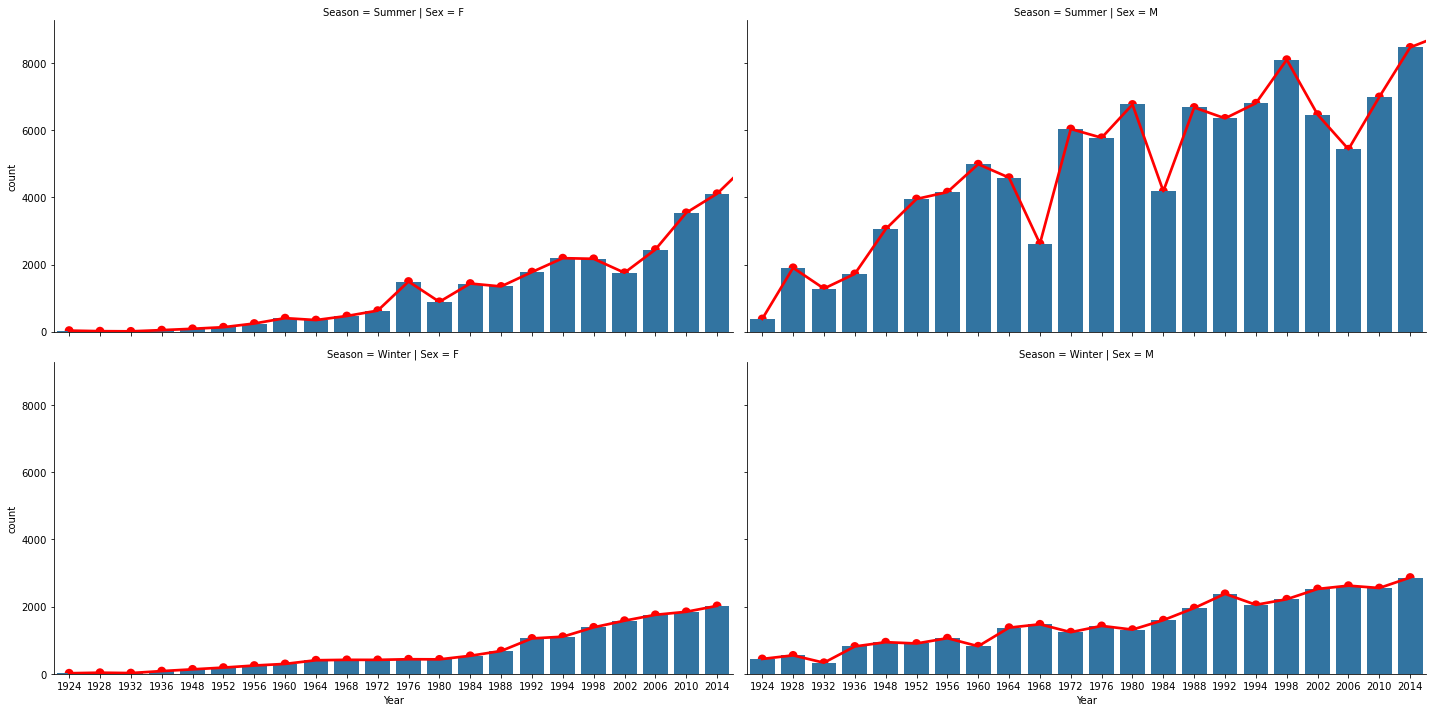

In [39]:
plt.figure(figsize=(20,5))

dx=df.groupby(['Season','Sex','Year']).size().reset_index()
dx['count']=dx[0]
dx.drop(0,axis=1,inplace=True)
g=sb.FacetGrid(data=dx,col='Sex',row='Season',height=5,aspect=2)
g.map(sb.barplot,"Year",'count');
g.map(sb.pointplot,"Year",'count',color='red');


- men and women both have similar interest in winter season 
- men prefer summer season over women

## How numeric values depend on each other ?

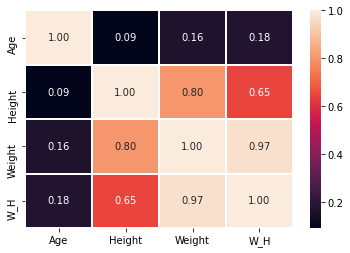

In [40]:
df2['W_H']= df2.Weight/df2.Height 
ax = sb.heatmap(df2.drop('Year',axis=1).corr(),fmt='0.2f', linewidths=1,annot=True)



Height and weight are related to each other

## How winners relate to Age , weight and height?

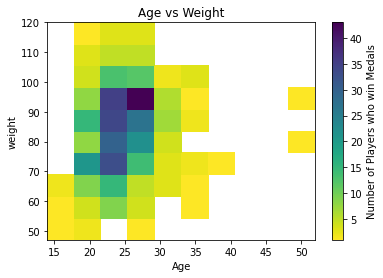

In [41]:
df2.dropna(inplace=True)
plt.hist2d(data = df2, x = 'Age', y = 'Weight',  
            cmap = 'viridis_r', cmin = 0.8);
plt.colorbar(label = 'Number of Players who win Medals');
plt.ylabel('weight')
plt.xlabel('Age')
plt.title('Age vs Weight');

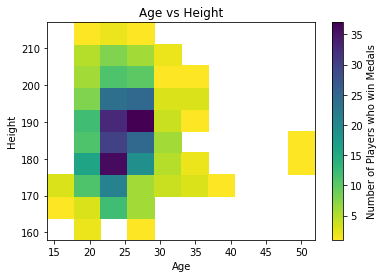

In [42]:
 
plt.hist2d(data = df2, x = 'Age', y = 'Height',  
             cmap = 'viridis_r', cmin = 0.5);
plt.colorbar(label = 'Number of Players who win Medals');
plt.ylabel('Height')
plt.xlabel('Age')
plt.title('Age vs Height');

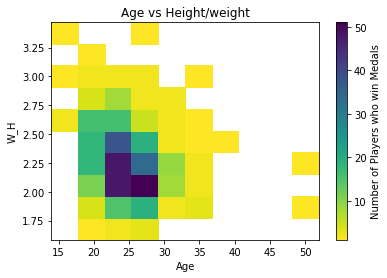

In [43]:
df2['W_H']=df2.Height/df2.Weight
plt.hist2d(data = df2, x = 'Age', y = 'W_H',  
             cmap = 'viridis_r', cmin = 0.5);
plt.colorbar(label = 'Number of Players who win Medals');
plt.ylabel('W_H')
plt.xlabel('Age')
plt.title('Age vs Height/weight');

we find most winners from (20 to 30) years , (70: 100) kilograms , (170 :200 )cm and (2:2.75) Height/weight 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- we find most winners from 20 to 30 years , 70: 100 kilograms and 170 :200 cm
- women became to be more intersted in winter season

### Were there any interesting or surprising interactions between features?

 - arts are canceled after 1950 
- we find most winners from 20 to 30 years , 70: 100 kilograms and 170 :200 cm
- women became to be more intersted in winter season
- that winter season has lower players 
- from 1994 even years have olympics in winter and odd years have it in summer
- 'Refugee Olympic Athletes' started in olympics in 2018
